# Bernoulli and Binomial Distribution - Lab

## Introduction
In this lab, you'll practice your newly gained knowledge on the Bernoulli and Binomial Distribution.

## Objectives
You will be able to:

* Apply the formulas for the Binomial and Bernoulli distribution to calculate the probability of a specific event
* Use `numpy` to randomly generate Binomial and Bernoulli trials
* Use `matplotlib` to show the output of generated Binomial and Bernoulli trials

## Apply the formulas for the Binomial and Bernoulli distributions

When playing a game of bowling, what is the probability of throwing exactly 3 strikes in a game with 10 rounds? Assume that the probability of throwing a strike is 25% for each round. Use the formula for the Binomial distribution to get to the answer. You've created this before, so we provide you with the function for factorials again:

In [1]:
def factorial(n):
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

n = 10  # total number of rounds
k = 3   # number of strikes
p = 0.25  # probability of throwing a strike

def binomial_coefficient(n, k):
    return factorial(n) // (factorial(k) * factorial(n - k))

In [4]:
# Calculate the probability using the Binomial distribution formula
binomial_coef = binomial_coefficient(n, k)
probability = binomial_coef * (p ** k) * ((1 - p) ** (n - k))

# Assign the result to p_3_strikes
p_3_strikes = probability
p_3_strikes
 #answer = 0.2502822

0.25028228759765625

Now, create a function for the Binomial distribution with three arguments $n$, $p$ and $k$ just like in the formula:

$$ \large P(Y=k)= \binom{n}{k} p^k(1-p)^{(n-k)}$$ 


In [5]:
def binom_distr(n, p, k):
    """
    Compute the probability of exactly k successes in n trials 
    with probability p of success in each trial (Binomial distribution).
    """
    binomial_coef = binomial_coefficient(n, k)
    probability = binomial_coef * (p ** k) * ((1 - p) ** (n - k))
    return probability

p_3_strikes = binom_distr(n, p, k)
p_3_strikes

0.25028228759765625

Validate your previous result by applying your new function.

In [6]:
# Your code here
def factorial(n):
    """Compute the factorial of a number n."""
    prod = 1
    while n >= 1:
        prod *= n
        n -= 1
    return prod

def binomial_coefficient(n, k):
    """Compute the binomial coefficient C(n, k) = n! / (k! * (n - k)!)"""
    return factorial(n) // (factorial(k) * factorial(n - k))

def binom_distr(n, p, k):
    """
    Compute the probability of exactly k successes in n trials 
    with probability p of success in each trial (Binomial distribution).
    """
    binomial_coef = binomial_coefficient(n, k)
    probability = binomial_coef * (p ** k) * ((1 - p) ** (n - k))
    return probability

# Parameters
n = 10  # total number of rounds
p = 0.25  # probability of throwing a strike
k = 3   # number of strikes

# Calculate the probability using the binomial distribution function
p_3_strikes = binom_distr(n, p, k)

print(f"The probability of exactly {k} strikes in {n} rounds is: {p_3_strikes:.4f}")


The probability of exactly 3 strikes in 10 rounds is: 0.2503


Now write a `for` loop along with your function to compute the probability that you have five strikes or more in one game. You'll want to use `numpy` here!

In [7]:
# Your code here
import numpy as np

def factorial(n):
    """Compute the factorial of a number n."""
    prod = 1
    while n >= 1:
        prod *= n
        n -= 1
    return prod

def binomial_coefficient(n, k):
    """Compute the binomial coefficient C(n, k) = n! / (k! * (n - k)!)"""
    return factorial(n) // (factorial(k) * factorial(n - k))

def binom_distr(n, p, k):
    """
    Compute the probability of exactly k successes in n trials 
    with probability p of success in each trial (Binomial distribution).
    """
    binomial_coef = binomial_coefficient(n, k)
    probability = binomial_coef * (p ** k) * ((1 - p) ** (n - k))
    return probability

# Parameters
n = 10  # total number of rounds
p = 0.25  # probability of throwing a strike

# Initialize total probability
total_probability = 0

# Calculate the probability for 5 strikes or more
for k in range(5, n + 1):
    total_probability += binom_distr(n, p, k)

print(f"The probability of having 5 strikes or more in one game is: {total_probability:.4f}")


The probability of having 5 strikes or more in one game is: 0.0781


## Use a simulation to get the probabilities for all the potential outcomes

Repeat the experiment 5000 times.

In [9]:
# leave the random seed here for reproducibility of results
np.random.seed(123)
#
def simulate_bowling_game(n_simulations, n_rounds, p_strike):
    strikes_counts = np.zeros(n_simulations, dtype=int)
    
    for i in range(n_simulations):
        # Simulate strikes for n_rounds with probability p_strike
        strikes = np.random.binomial(n_rounds, p_strike)
        strikes_counts[i] = strikes
    
    return strikes_counts

# Parameters
n_simulations = 5000
n_rounds = 10
p_strike = 0.25

# Simulate the bowling game
strikes_counts = simulate_bowling_game(n_simulations, n_rounds, p_strike)

# Calculate frequencies for each number of strikes (from 0 to n_rounds)
freq, strikes = np.histogram(strikes_counts, bins=np.arange(n_rounds + 2))

    
print(strikes[:-1])
print(freq)


[ 0  1  2  3  4  5  6  7  8  9 10]
[ 310  941 1368 1286  707  297   78   11    2    0    0]


In [ ]:
# the results should look like this:
# [0 1 2 3 4 5 6 7 8]
# [ 310  941 1368 1286  707  297   78   11    2]

## Visualize these results

Create the PMF using these empirical results (that is, the proportions based on the values we obtained running the experiment 5000 times).

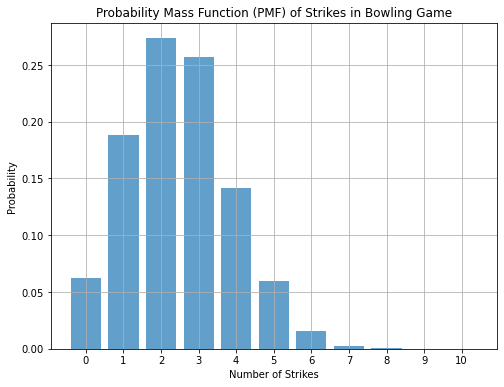

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
#
#

# Calculate proportions (PMF)
proportions = freq / n_simulations

# Plot PMF
plt.figure(figsize=(8, 6))
plt.bar(strikes[:-1], proportions, width=0.8, align='center', alpha=0.7)
plt.xticks(strikes[:-1])
plt.xlabel('Number of Strikes')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of Strikes in Bowling Game')
plt.grid(True)
plt.show()

You should see that, with a 25% strike hit rate, even when simulating 5000 times, an almost perfect and/or perfect game of 9 and 10 strikes didn't even occur once! If you change the random seed, however, you'll see that perfect games will show up occasionally. 

Next, let's create the CDF based on these results. You can use `np.cumsum` to obtain cumulative probabilities.

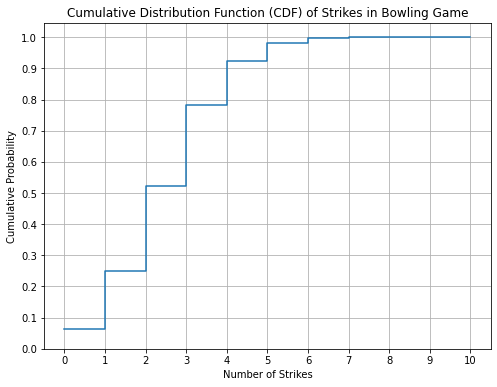

In [11]:
# Your code here
#
#
# Calculate cumulative probabilities (CDF)
cumulative_probabilities = np.cumsum(proportions)

# Plot CDF
plt.figure(figsize=(8, 6))
plt.step(strikes[:-1], cumulative_probabilities, where='post')
plt.xlabel('Number of Strikes')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Strikes in Bowling Game')
plt.xticks(strikes[:-1])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.show()


## Summary

Congratulations! In this lab, you practiced your newly gained knowledge of the Bernoulli and Binomial Distribution.